# Titre du projet : Prévision du taux de désabonnement des clients dans le secteur de la télécommunication

Chargement du jeu de données

In [257]:
import numpy as np #importation de la bibliothèque numpy
import pandas as pd #importation de la bibliothèque pandas
import matplotlib.pyplot as plt  # importation de la bibliothèque matplo-tlib
import seaborn as sns  # importation de la bibliothèque seaborn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC






data = pd.read_csv('customer_churn_data.csv',header=0) #la lecture du fichier csv

print('les cinq premières lignes\n',data.head()) # affichage des cinq pre-mières lignes


les cinq premières lignes
    CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0           1   49    Male       4           88.35  Month-to-Month   
1           2   43    Male       0           36.67  Month-to-Month   
2           3   51  Female       2           63.79  Month-to-Month   
3           4   60  Female       8          102.34        One-Year   
4           5   42    Male      32           69.01  Month-to-Month   

  InternetService  TotalCharges TechSupport Churn  
0     Fiber Optic        353.40         Yes   Yes  
1     Fiber Optic          0.00         Yes   Yes  
2     Fiber Optic        127.58          No   Yes  
3             DSL        818.72         Yes   Yes  
4             NaN       2208.32          No   Yes  


Exploration du jeu de données

In [258]:
data.shape

(1000, 10)

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [260]:
data.describe(include='all')

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
count,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000,703,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,NaN,3,2,NaN,2,2
top,NaN,NaN,Female,NaN,NaN,Month-to-Month,Fiber Optic,NaN,Yes,Yes
freq,NaN,NaN,538,NaN,NaN,511,395,NaN,506,883
mean,500.500000,44.674000,NaN,18.97300,74.391290,NaN,NaN,1404.364060,NaN,NaN
std,288.819436,9.797741,NaN,18.89257,25.712083,NaN,NaN,1571.755048,NaN,NaN
min,1.000000,12.000000,NaN,0.00000,30.000000,NaN,NaN,0.000000,NaN,NaN
25%,250.750000,38.000000,NaN,5.00000,52.357500,NaN,NaN,345.217500,NaN,NaN
50%,500.500000,45.000000,NaN,13.00000,74.060000,NaN,NaN,872.870000,NaN,NaN
75%,750.250000,51.000000,NaN,26.00000,96.102500,NaN,NaN,1900.175000,NaN,NaN


La suppression de la colonne CustomerID qui n'apporte aucune information statistique au jeu de données.

In [261]:
data=data.drop(['CustomerID'],axis=1)
data.head()



,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


Affichage des valeurs manquantes par colonne

In [262]:
Missing_values=data.isnull().sum() 
Missing_values

Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

Pourcentage des valeurs manquantes par colonne

In [263]:
Missing_percent=(Missing_values)/len(data)*100 
Missing_percent

Age                 0.0
Gender              0.0
Tenure              0.0
MonthlyCharges      0.0
ContractType        0.0
InternetService    29.7
TotalCharges        0.0
TechSupport         0.0
Churn               0.0
dtype: float64

Traitement des valeurs manquantes de la variable InternetService

In [264]:
data['InternetService']=data['InternetService'].fillna('Missing')
data.head()


,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,42,Male,32,69.01,Month-to-Month,Missing,2208.32,No,Yes


Visualisation des variables qualitatives

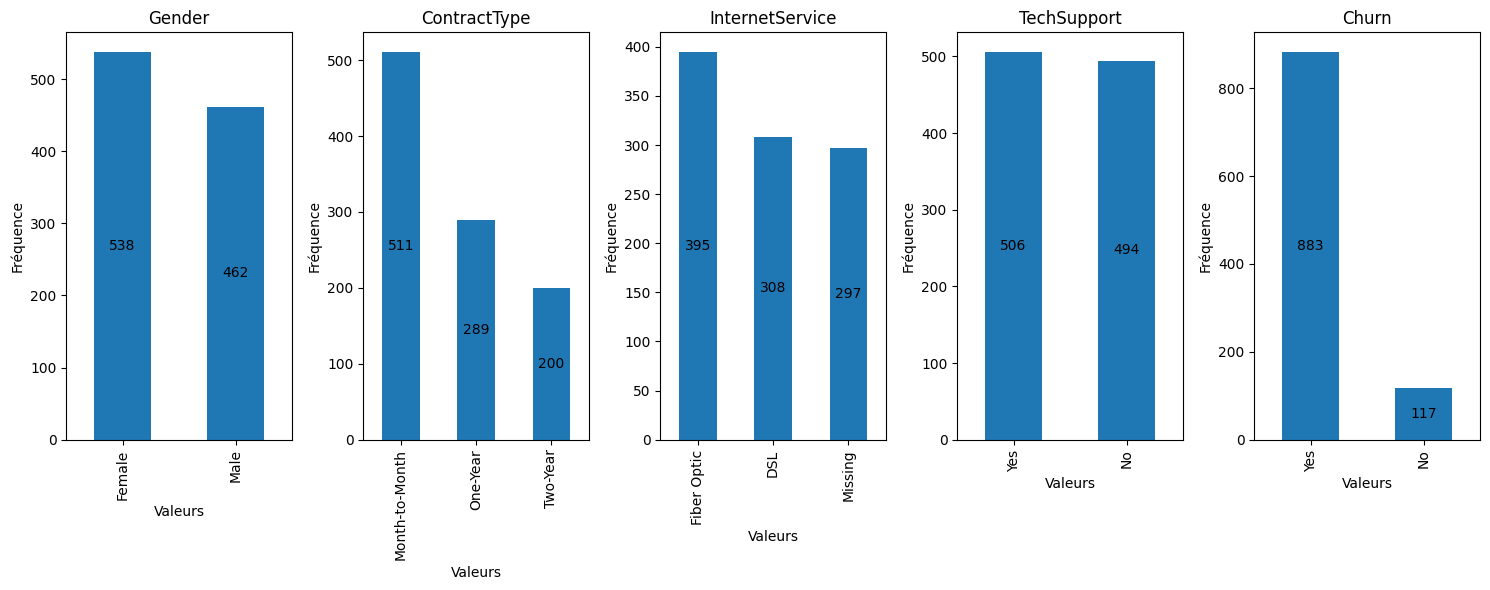

In [265]:
cats = ['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn']
nums = [col for col in data.columns if col not in cats]
fig, axes = plt.subplots(ncols=len(cats), figsize=(15, 6))
for i, col in enumerate(cats):
    ax = axes[i]
    value_counts = data[col].value_counts()
    value_counts.plot(kind="bar", ax=ax)
    
    # Ajouter les labels directement
    ax.bar_label(ax.containers[0], label_type="center")
    # Titre et axes
    ax.set_title(col)
    ax.set_xlabel('Valeurs')
    ax.set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


Les relations entre les variables qualitatives et la variable cible churn

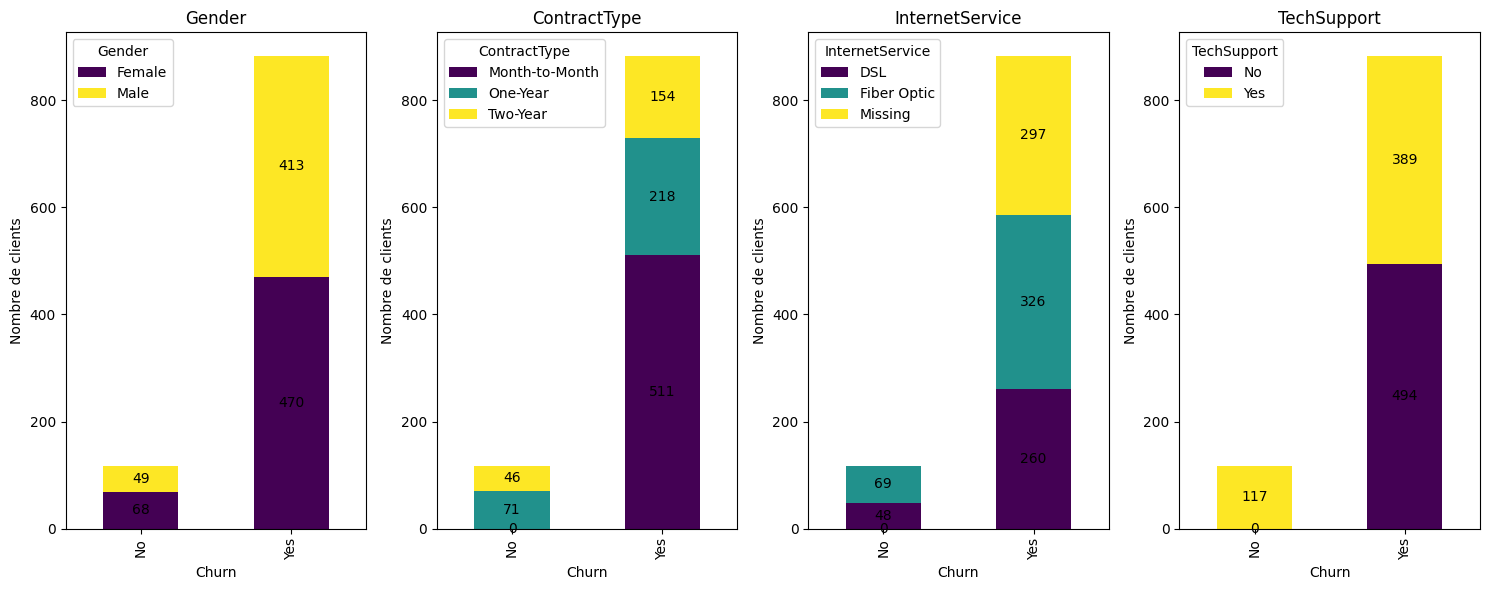

In [266]:
# Variables catégoriques
cats = ["Gender", "ContractType", "InternetService", "TechSupport", "Churn"]

# Identification des colonnes numériques
nums = [col for col in data.columns if col not in cats]

# Création des graphiques
fig, axes = plt.subplots(ncols=len(cats) - 1, figsize=(15, 6))  # Exclure "Churn"

# Visualisation des variables catégoriques
for i, cat in enumerate(cats[:-1]):  # Exclure "Churn" ici
    counts = data.groupby(['Churn', cat]).size().unstack(fill_value=0)
    bar_container = counts.plot(kind="bar", ax=axes[i], stacked=True, colormap='viridis')

    # Ajouter des étiquettes directement
    for bar_group in bar_container.containers:
        axes[i].bar_label(bar_group, label_type="center")
    
    # Ajouter des titres et étiquettes
    axes[i].set_title(cat)
    axes[i].set_ylabel("Nombre de clients")
    axes[i].set_xlabel("Churn")
    axes[i].legend(title=cat)

plt.tight_layout()
plt.show()


Visualisation des variables quantitatives

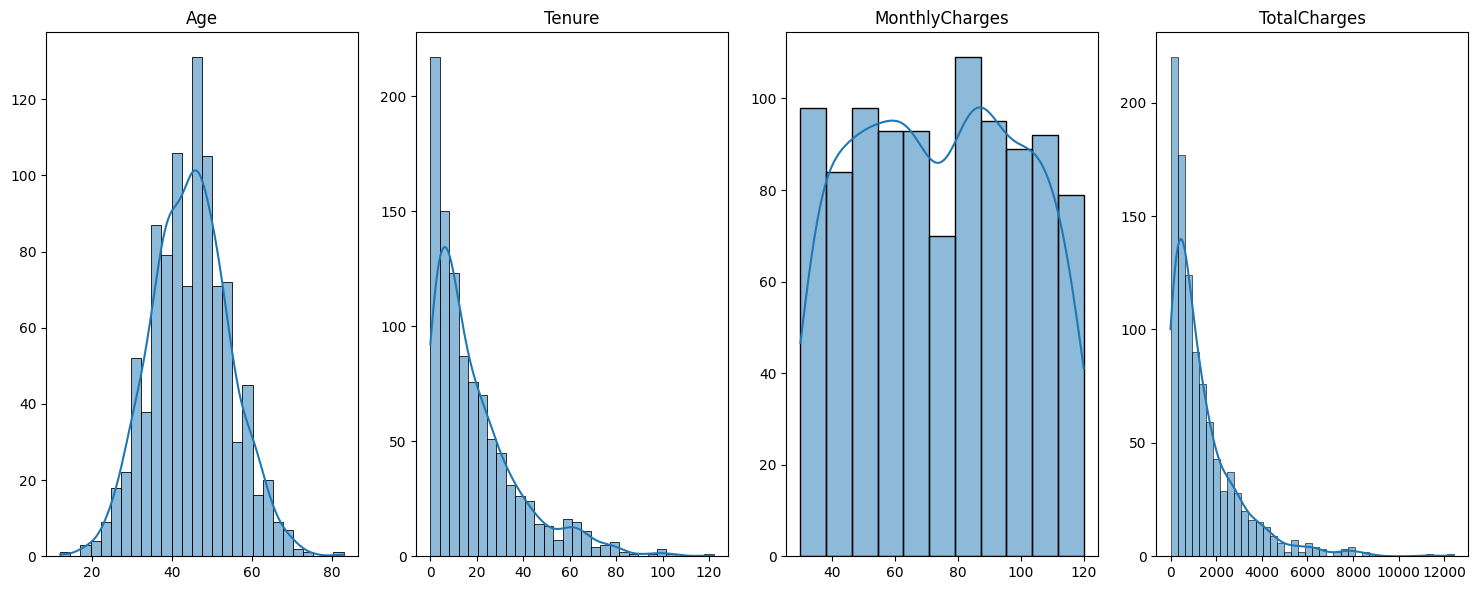

In [267]:

cats = ["Gender", "ContractType", "InternetService", "TechSupport", "Churn"]

nums = [col for col in data.columns if col not in cats]

fig, axes = plt.subplots(ncols=4, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.histplot(data, x=j, kde=True, ax=axes[i])
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()


Distribution des variables quantitatives par rapport à la variable cible churn

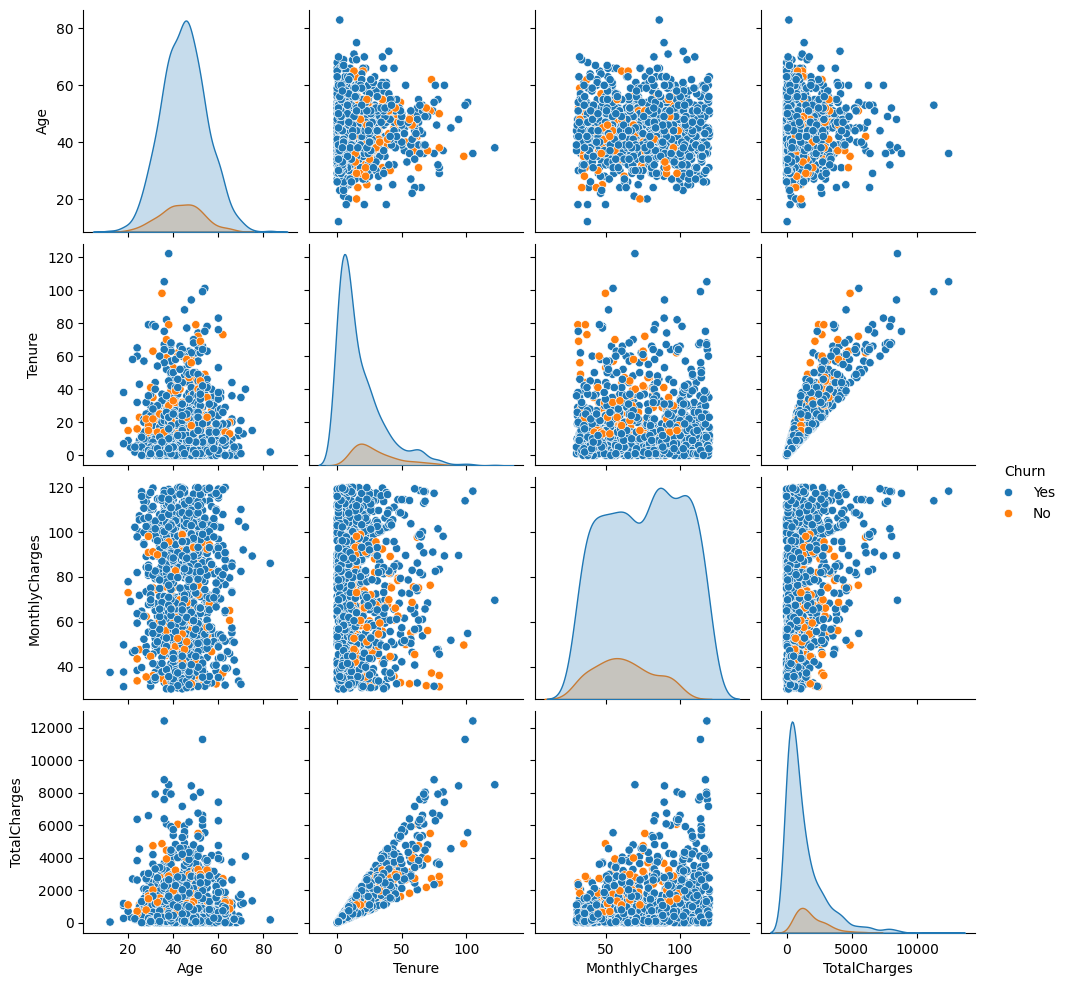

In [268]:
cats = ["Gender", "ContractType", "InternetService", "TechSupport", "Churn"]

nums = [col for col in data.columns if col not in cats]

sns.pairplot(data, vars=nums, hue=cats[-1])
plt.show()


Visualisation des valeurs moyennes numériques des variables quantitatives par rapport à la variable churn

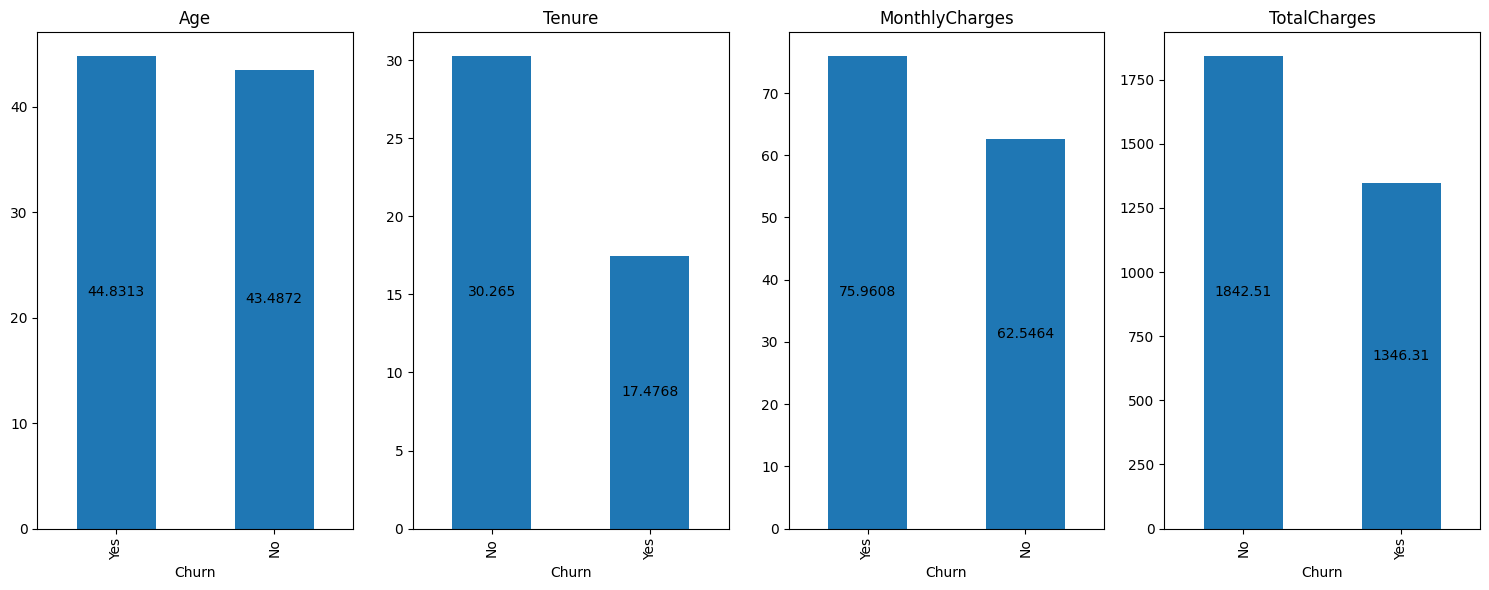

In [269]:

cats = ["Gender", "ContractType", "InternetService", "TechSupport", "Churn"]

nums = [col for col in data.columns if col not in cats]

# Création des sous-graphiques
fig, axes = plt.subplots(ncols=4, figsize=(15, 6))

grouped = data.groupby(cats[-1])

for i, j in enumerate(nums):
    mean = grouped[j].mean()
    mean = mean.sort_values(ascending=False)
    mean.plot(kind="bar", ax=axes[i])

    # Ajouter les étiquettes directement sur les barres
   
    axes[i].bar_label(axes[i].containers[0], label_type="center")
    axes[i].set_title(j)

plt.tight_layout()
plt.show()


Les valeurs moyennes des caractéristiques numériques parmi les groupes catégoriels influencent les résultats de désabonnement

Gender
ContractType
InternetService
TechSupport


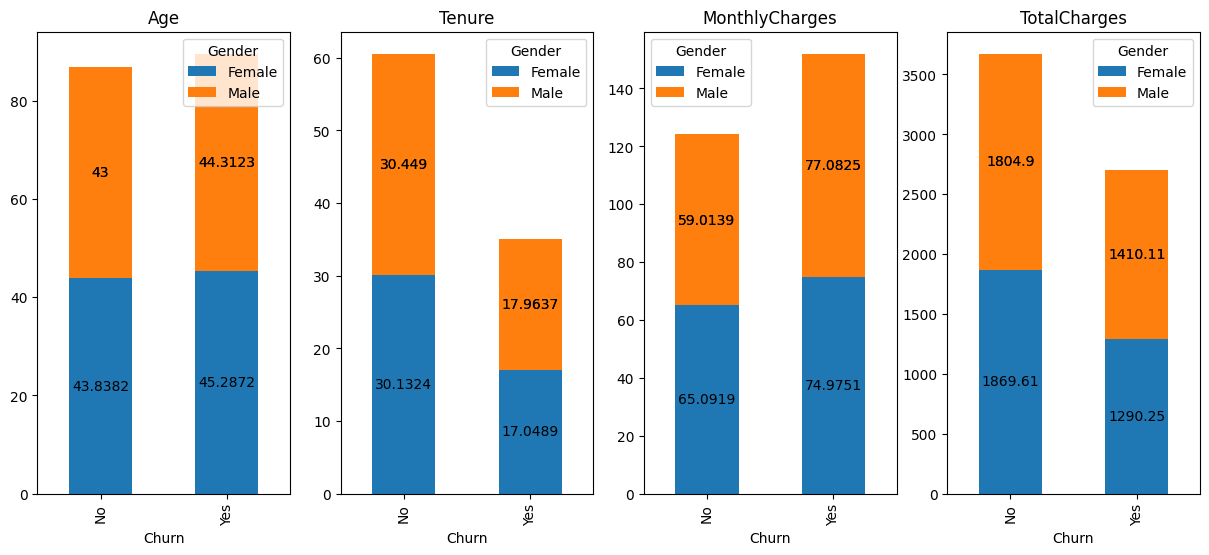

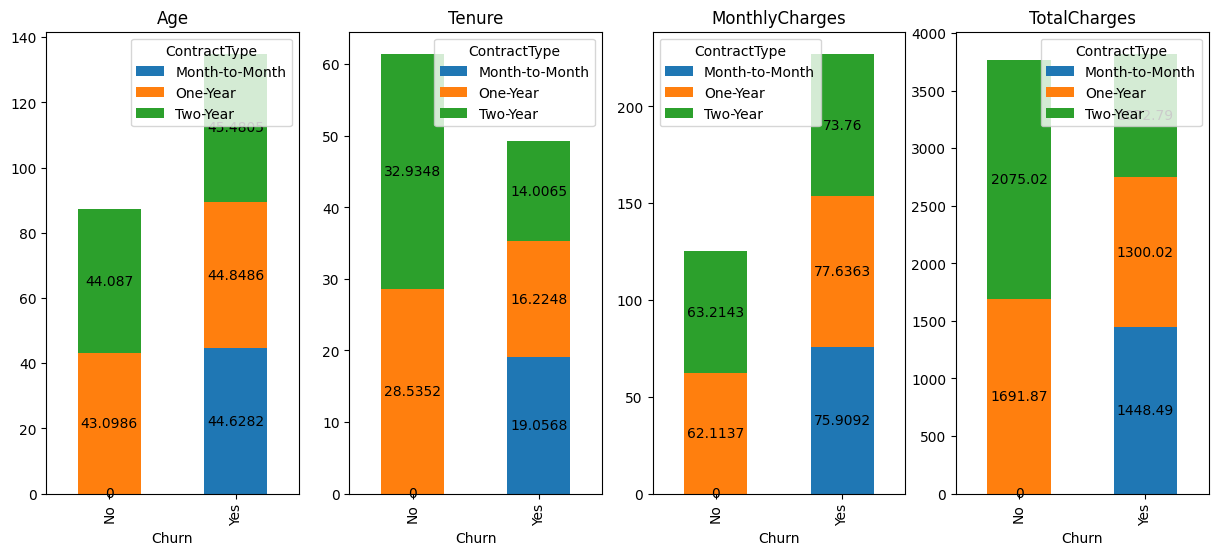

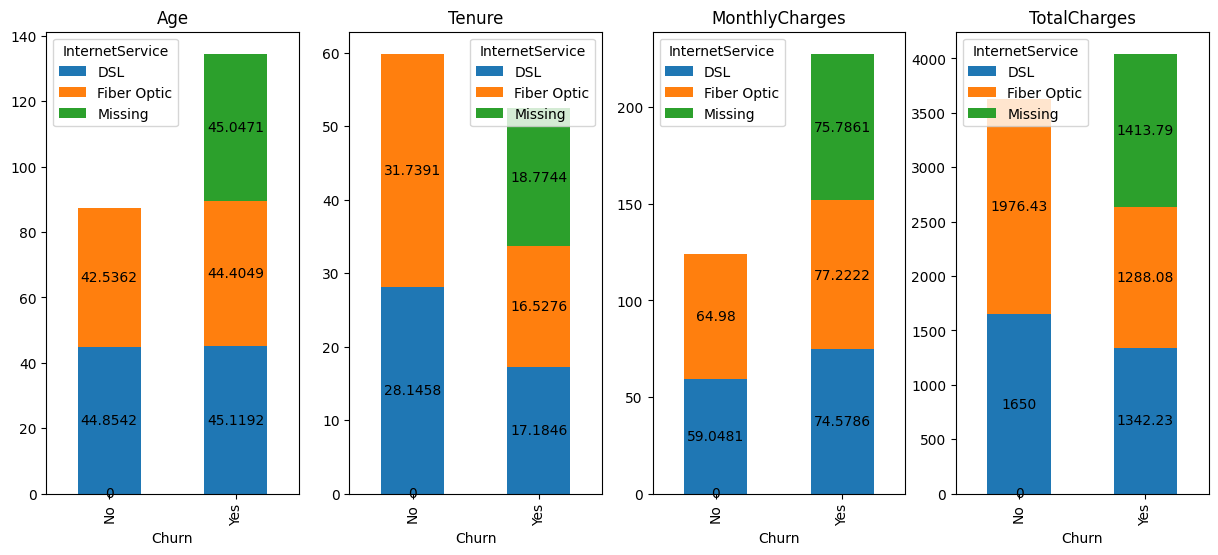

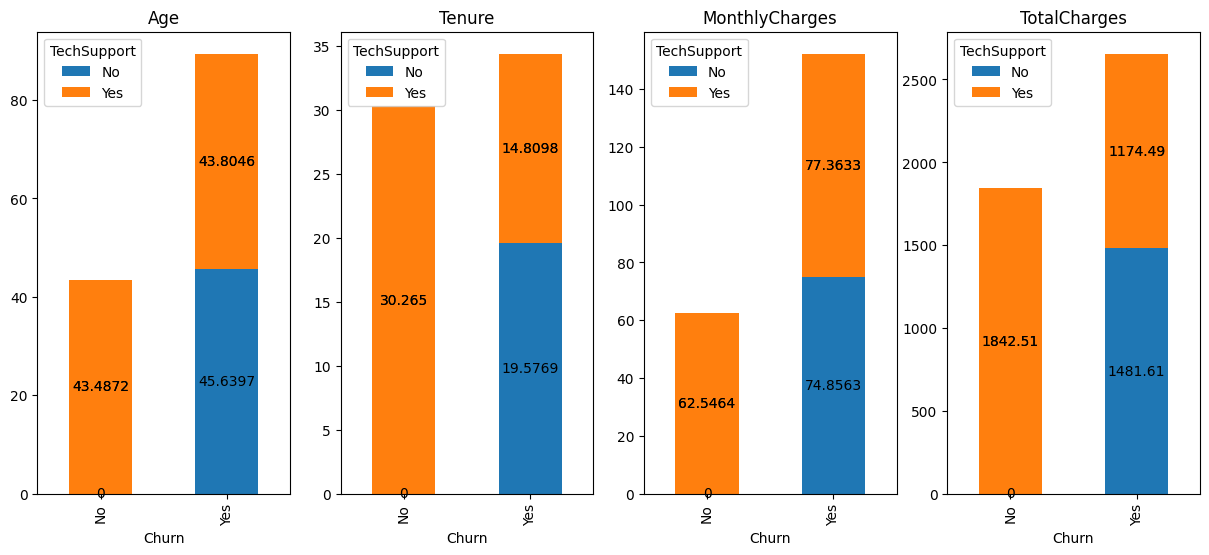

In [270]:
# Variable categorique 
cats = ["Gender", "ContractType", "InternetService", "TechSupport", "Churn"]

# variable numerique
nums = [col for col in data.columns if col not in cats]
for i in cats[:-1]:
    print(f"{i}")  
    grouped = data.groupby([cats[-1], i])
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    
    for j, k in enumerate(nums):
        mean = grouped[k].mean().unstack()
        mean.plot(kind="bar", ax=axes[j], stacked=True)
        axes[j].bar_label(axes[j].containers[0], label_type="center")  
        axes[j].bar_label(axes[j].containers[1], label_type="center")
        axes[j].bar_label(axes[j].containers[-1], label_type="center")
        axes[j].set_title(k)


Convertion des variables categoriques en variables numériques

In [271]:
nums = [col for col in data.columns if col not in cats]

# encodage des caracteristiques qualitatives
lab = LabelEncoder()
for i in cats:
    data[i] = lab.fit_transform(data[i].values)

data.head()


,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,49,1,4,88.35,0,1,353.40,1,1
1,43,1,0,36.67,0,1,0.00,1,1
2,51,0,2,63.79,0,1,127.58,0,1
3,60,0,8,102.34,1,0,818.72,1,1
4,42,1,32,69.01,0,2,2208.32,0,1


Visualisation de la corrélation entre les variables quantitatives 

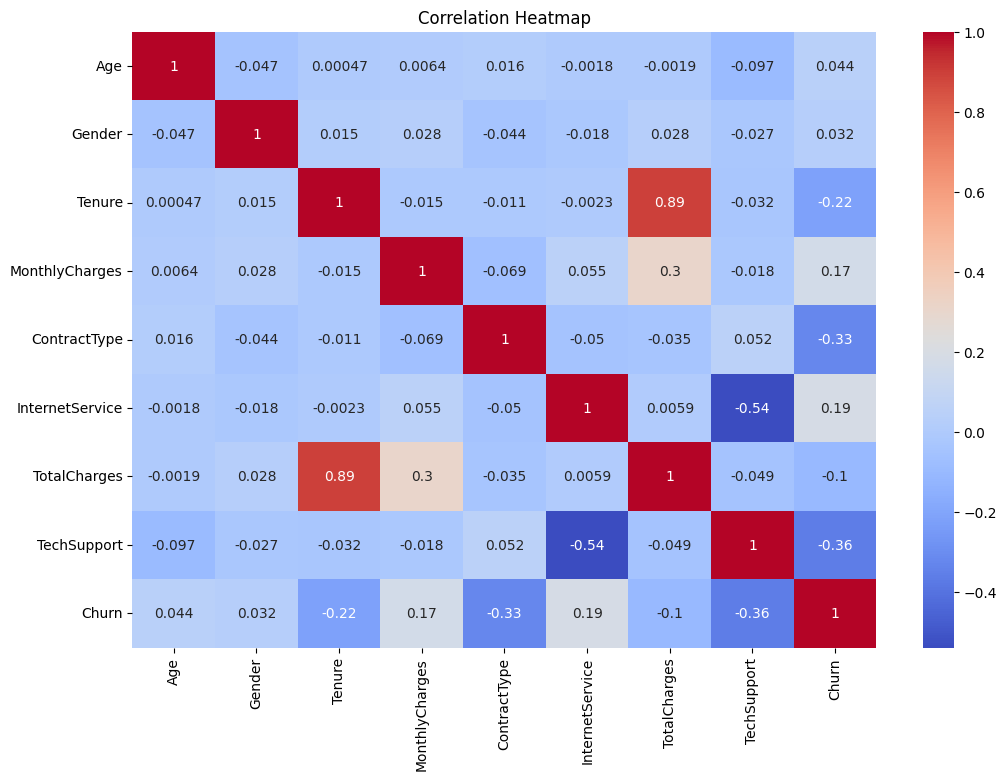

In [272]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Nous remarquons que les variables TotalCharges et Tenures sont fortement corrélées donc nous supprimons TotalCharges qui a une faible correlation avce la variable cible churn

In [273]:
data=data.drop(['TotalCharges'],axis=1)
data.head()


,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TechSupport,Churn
0,49,1,4,88.35,0,1,1,1
1,43,1,0,36.67,0,1,1,1
2,51,0,2,63.79,0,1,0,1
3,60,0,8,102.34,1,0,1,1
4,42,1,32,69.01,0,2,0,1


La normalisation des variables quantitatives

In [274]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

Separation du jeu de données en valeurs d'entrainement et de test

In [275]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

Entrainement des modèles

In [276]:

# Dictionnaire des modèles de classification
models = {
    'Logistic_Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGB': XGBClassifier(),
    'SVM': SVC()
    }

# Dictionnaire pour stocker les résultats
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Entraînement et évaluation de chaque modèle

for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)
    accuracy = accuracy_score(y_test, obj_pred>0.5)
    precision = precision_score(y_test, obj_pred>0.5)
    recall = recall_score(y_test, obj_pred>0.5)
    f1 = f1_score(y_test, obj_pred>0.5)
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
results_data = pd.DataFrame(results)
results_data



,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic_Regression,0.920,0.935135,0.977401,0.955801
1,KNN,0.965,0.967033,0.994350,0.980501
2,DecisionTree,1.000,1.000000,1.000000,1.000000
3,RandomForest,1.000,1.000000,1.000000,1.000000
4,XGB,1.000,1.000000,1.000000,1.000000
5,SVM,0.970,0.967213,1.000000,0.983333


Matrice de confusion

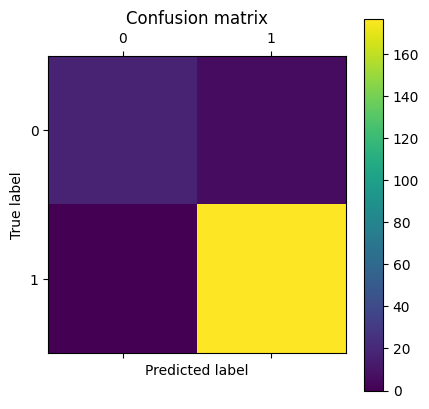

In [277]:
cm=confusion_matrix(y_test, obj_pred)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()